In [1]:
import nltk

In [15]:
from nltk.corpus import inaugural
from nltk.corpus import brown

In [3]:
c =inaugural.raw('1789-Washington.txt')
c = c.split(' ')

In [4]:
import string
x = [''.join(c for c in s if c not in string.punctuation) for s in c]

In [5]:
x = [i.lower() for i in x]

In [6]:
t = ['\n']
x = [''.join(j for j in s if j not in t) for s in x]

In [7]:
x = [i for i in x if i]

In [8]:
from collections import Counter
cc = Counter(x)

In [9]:
cc.most_common(10)

[('the', 116),
 ('of', 71),
 ('and', 48),
 ('to', 47),
 ('which', 36),
 ('in', 31),
 ('i', 23),
 ('be', 23),
 ('my', 22),
 ('by', 19)]

In [10]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
x=[i for i in x if i not in stop]

In [24]:
cc = Counter(x)
cc.most_common(10)

[('every', 9),
 ('government', 8),
 ('public', 6),
 ('may', 6),
 ('present', 5),
 ('country', 5),
 ('one', 4),
 ('citizens', 4),
 ('ought', 4),
 ('duty', 4)]

In [25]:
cc = {x : cc[x] for x in cc if cc[x] >= 3 }
k = list(cc.keys())
r = list(cc.values())

In [27]:
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.plotly as py
import plotly.graph_objs as go

layout = dict(
    title = "Wordcount",
)

data = [go.Bar(
            x=k,
            y=r,
            text=k,
            textposition = 'auto',
            marker=dict(
                color='rgb(178,34,34)',
            ),
            opacity=0.6
        )]

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "murd")

In [16]:
cfd = nltk.ConditionalFreqDist(
           (genre, word)
           for genre in brown.categories()
           for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [42]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt']

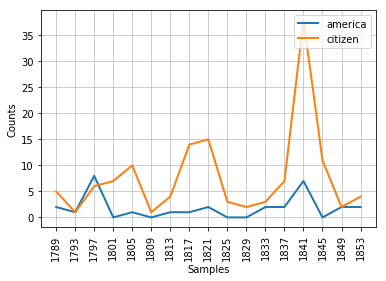

In [44]:
import matplotlib.pyplot
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4])
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['america', 'citizen']
           if w.lower().startswith(target))
cfd.plot()

In [ ]:
# nltk.download('reuters')

In [63]:
from nltk.corpus import reuters 
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [73]:
test = (reuters.words('test/14826'))

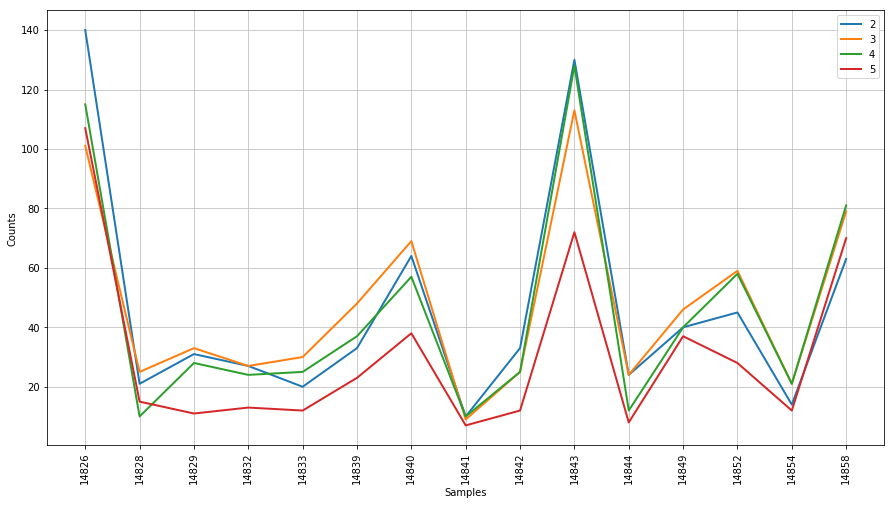

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
cfd = nltk.ConditionalFreqDist(
           (target, fileid[5:])
           for fileid in reuters.fileids()[:15]
           for w in reuters.words(fileid)
           for target in [2,3,4,5]
           if len(w.lower()) == target)
cfd.plot()

In [5]:
c

'Fellow-Citizens of the Senate and of the House of Representatives:\n\nAmong the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not